<a href="https://colab.research.google.com/github/meetAmarAtGithub/Reva_NLPandText-Analytics/blob/main/FakeNewsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='brown'>**Fake News Analysis**</font>

Assignment GuidelinesAssignment 2–NLP and Text Analytics<br>Dated:09thJuly 2022<br>Batch:AI03<br>Trimester:2<br>Module Name:NLP and Text Analytics<br>Mentor:Usha Rengaraju<br>Marks:10<br><br>Objective :<br>1.To learn about pre-processing.<br>2.To learn aboutDeep Learning<br><br>Assignment Details: Complete the below mentioned tasks as a part of your Assignment. The dataset has been provided to you in CSV Format, as a zip file.<br>1.This is a group (Max 3 members)or an individualassignment.<br>2.Please attempt to solve the following question.<br><br>1.Perform preprocessing on the given dataset.<br>2.Prepare a Deep Learning model on the same after the preprocessing.<br><br>Outcome:<br>1.Participants will be able to learn how to do preprocessing on any given dataset.<br>2.Participants will be able to learn how to build a Deep Learning model and make the predictions.



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics"

/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics


In [ ]:
!mkdir "/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics/News"

In [ ]:
import numpy as np
import pandas as pd
import string
import re
import nltk
from textblob import Word 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Tensorflow
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Version:  2.8.2
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


#<font color='blue'><b>Data Pre-Procesing</b></font>

In [ ]:
df_fake = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics/News/Fake.csv')
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics/News/True.csv')
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake['class'] = 1
df_fake.tail(5)

,title,text,subject,date,class
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [ ]:
df_true['class'] = 0
df_true.tail(5)

,title,text,subject,date,class
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [ ]:
#Concat fake and true dataset and cretae a marged dataset
df_marge = pd.concat([df_fake,df_true], axis = 0)
df_marge.head(5)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
#Show column in marged dataset
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
#Drop un-important columns from marged dataset
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [ ]:
#Look for Null data
df.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
#Shuffle data in dataset
df = df.sample(frac = 1)
df.head(10)

,text,class
16212,"BERLIN (Reuters) - Alice Weidel, a leader of G...",0
2845,(Reuters) - U.S. President Donald Trump’s comm...,0
1789,WASHINGTON (Reuters) - The U.S. State Departme...,0
1098,The question as to whether Donald Trump is bei...,1
20517,"MEDELLIN, Colombia (Reuters) - Pope Francis on...",0
15240,Bryan Pagliano is in hot water with this and h...,1
11950,ANKARA (Reuters) - Turkish Justice Minister Ab...,0
12578,JAKARTA (Reuters) - Indonesian anti-terrorism ...,0
13948,DUBLIN (Reuters) - Ireland s finance minister ...,0
12223,A federal judge has ordered Michigan election ...,1


In [ ]:
#Handle index numbers
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df.head(5)

,text,class
0,BERLIN (Reuters) - Two veteran allies of Chanc...,0
1,"Former Senate President of Haiti, Bernard Sans...",1
2,WASHINGTON (Reuters) - The U.S. Justice Depart...,0
3,The election result tonight is hard to swallow...,1
4,(This version of the story corrects spelling ...,0


In [ ]:
# 52% of news are fake and 47.7% news is true
df['class'].value_counts(normalize=True)

1    0.522985
0    0.477015
Name: class, dtype: float64

### <font color="blue">**Remove Stopwords and Delimeter**</font>

In [ ]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


df['text'].apply(text_process)
df.head(5)

16212    [BERLIN, Reuters, Alice, Weidel, leader, Germa...
2845     [Reuters, US, President, Donald, Trump’s, comm...
1789     [WASHINGTON, Reuters, US, State, Department, a...
1098     [question, whether, Donald, Trump, investigate...
20517    [MEDELLIN, Colombia, Reuters, Pope, Francis, S...
                               ...                        
3041     [WASHINGTON, Reuters, Leading, US, congressmen...
18934    [14year, old, girl, BRUTALLY, raped, sodomized...
17068    [LONDON, Reuters, British, Prime, Minister, Th...
17809    [Bill, Chelsea, Clinton, dodged, reporters, as...
3050     [Donald, Trump, recent, press, conference, Wed...
Name: text, Length: 44898, dtype: object

,text,class
16212,"BERLIN (Reuters) - Alice Weidel, a leader of G...",0
2845,(Reuters) - U.S. President Donald Trump’s comm...,0
1789,WASHINGTON (Reuters) - The U.S. State Departme...,0
1098,The question as to whether Donald Trump is bei...,1
20517,"MEDELLIN, Colombia (Reuters) - Pope Francis on...",0


### <font color="blue">**Lemmatization**</font>

In [ ]:
lemmatizer = WordNetLemmatizer()

print('With out Lammetization - ', df['text'][2])

Lemmatized = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print('With Lemmatization -     ',  Lemmatized[2])

With out Lammetization -  2    On Friday, it was revealed that former Milwauk...
2    WASHINGTON (Reuters) - The special counsel inv...
Name: text, dtype: object
With Lemmatization -      2    On Friday, it wa revealed that former Milwauke...
2    WASHINGTON (Reuters) - The special counsel inv...
Name: text, dtype: object


### <font color="blue"> 1.Remove links from the dataset. <br> 2.Remove special characters or symbols from the dataset. <br> 3. Remove numbers or alphanumerical characters from the dataset.</font>

In [ ]:
df['text'] = df['text'].str.replace(r'([\w\.-]+)@([\w\.-]+)',' ') #remove email addresses
df['text'] = df['text'].str.replace(r'[^\w\s]',' ') #remove punctuations and special chareters from dataset
df['text'] = df['text'].str.replace(r'(https|http)?:\/\/(\w|\.|\_|\/|\?|\=|\&|\%)*\b', ' ') # Remove links from the dataset.
df['text'] = df['text'].str.replace(r'[^\w]', ' ') #Remove not alphanumeric symbols white spaces

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#df.reset_index(inplace = True)
df.drop(["index","level_0"], axis = 1, inplace = True)
df.head(5)

,text,class
0,BERLIN Reuters Alice Weidel a leader of G...,0
1,Reuters U S President Donald Trump s comm...,0
2,WASHINGTON Reuters The U S State Departme...,0
3,The question as to whether Donald Trump is bei...,1
4,MEDELLIN Colombia Reuters Pope Francis on...,0


#<font color='brown'><b>Model creation and prediction</b></font><br>
## <font color="blue">Train-Test Split and perform the classification task using the Naive Bayes classification model. <br> </font>

In [ ]:
x = df['text']
y = df['class']

len(x), len(y)

(44898, 44898)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

33673 33673
11225 11225


In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = x_train[:15000]
partial_x_train = x_train[15000:]

y_val = y_train[:15000]
partial_y_train = y_train[15000:]

x_val.size
print()
partial_x_train.size
print()
y_val.size
print()
partial_y_train.size

15000

18673

15000

18673

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=500,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/30
38/38 [==============================] - 32s 787ms/step - loss: 0.4928 - accuracy: 0.8180 - val_loss: 0.3115 - val_accuracy: 0.9211
Epoch 2/30
38/38 [==============================] - 26s 677ms/step - loss: 0.2264 - accuracy: 0.9418 - val_loss: 0.1661 - val_accuracy: 0.9562
Epoch 3/30
38/38 [==============================] - 26s 687ms/step - loss: 0.1219 - accuracy: 0.9713 - val_loss: 0.1047 - val_accuracy: 0.9733
Epoch 4/30
38/38 [==============================] - 26s 687ms/step - loss: 0.0712 - accuracy: 0.9850 - val_loss: 0.0742 - val_accuracy: 0.9795
Epoch 5/30
38/38 [==============================] - 26s 690ms/step - loss: 0.0437 - accuracy: 0.9924 - val_loss: 0.0580 - val_accuracy: 0.9843
Epoch 6/30
38/38 [==============================] - 26s 691ms/step - loss: 0.0279 - accuracy: 0.9965 - val_loss: 0.0481 - val_accuracy: 0.9868
Epoch 7/30
38/38 [==============================] - 26s 692ms/step - loss: 0.0186 - accuracy: 0.9979 - val_loss: 0.0425 - val_accuracy: 0.9879

In [31]:
results = model.evaluate(x_test, y_test)

print(results)

351/351 [==============================] - 28s 80ms/step - loss: 0.0308 - accuracy: 0.9911
[0.030804041773080826, 0.9910913109779358]


### <font color="blue">**Model accuracy is - 99.1%**</font>

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

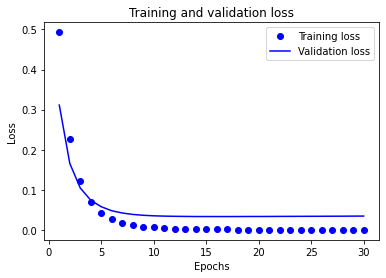

In [33]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

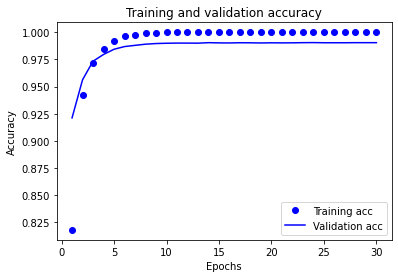

In [34]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()